### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
df = pd.read_csv('data/Final_merged_dataset_clean.csv')

In [3]:
df.shape, df.columns.values

((13297, 96),
 array(['id', 'home_team_api_id', 'away_team_api_id', 'crossing_h',
        'finishing_h', 'heading_accuracy_h', 'short_passing_h',
        'volleys_h', 'dribbling_h', 'curve_h', 'free_kick_accuracy_h',
        'long_passing_h', 'ball_control_h', 'acceleration_h',
        'sprint_speed_h', 'agility_h', 'reactions_h', 'balance_h',
        'shot_power_h', 'jumping_h', 'stamina_h', 'strength_h',
        'long_shots_h', 'aggression_h', 'interceptions_h', 'positioning_h',
        'vision_h', 'penalties_h', 'marking_h', 'standing_tackle_h',
        'sliding_tackle_h', 'gk_diving_h', 'gk_handling_h', 'gk_kicking_h',
        'gk_positioning_h', 'gk_reflexes_h', 'crossing_a', 'finishing_a',
        'heading_accuracy_a', 'short_passing_a', 'volleys_a',
        'dribbling_a', 'curve_a', 'free_kick_accuracy_a', 'long_passing_a',
        'ball_control_a', 'acceleration_a', 'sprint_speed_a', 'agility_a',
        'reactions_a', 'balance_a', 'shot_power_a', 'jumping_a',
        'stamina_

In [4]:
df.head(5)

,id,home_team_api_id,away_team_api_id,crossing_h,finishing_h,heading_accuracy_h,short_passing_h,volleys_h,dribbling_h,curve_h,...,defenceAggression_h,defenceTeamWidth_h,buildUpPlaySpeed_a,buildUpPlayPassing_a,chanceCreationPassing_a,chanceCreationCrossing_a,chanceCreationShooting_a,defencePressure_a,defenceAggression_a,defenceTeamWidth_a
0,1729,10260,10261,81.0,72.0,81.0,81.0,79.0,79.0,79.0,...,48.000000,54.833333,58.166667,55.333333,53.500000,57.333333,49.833333,46.666667,48.333333,48.333333
1,1730,9825,8659,77.0,80.0,90.0,88.0,79.0,79.0,80.0,...,46.500000,50.500000,57.500000,51.500000,53.000000,56.000000,54.666667,43.000000,45.666667,54.833333
2,1731,8472,8650,79.0,66.0,78.0,82.0,69.0,80.0,78.0,...,52.166667,51.833333,57.666667,44.333333,41.333333,47.833333,57.333333,51.000000,52.500000,56.000000
3,1732,8654,8528,81.0,71.0,77.0,87.0,69.0,81.0,80.0,...,42.833333,40.166667,47.166667,50.666667,52.666667,55.500000,45.500000,50.000000,54.000000,46.000000
4,1734,8668,8655,74.0,80.0,74.0,83.0,77.0,80.0,78.0,...,57.500000,56.333333,52.500000,63.833333,57.000000,56.000000,42.000000,45.666667,55.000000,46.666667


In [23]:
####pd.get_dummies(df, columns='').head()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['match_winner', 'id']), 
                                                    df.match_winner, test_size=0.3, 
                                                    random_state=47)

In [25]:
X_train.shape, X_test.shape

((9307, 94), (3990, 94))

In [26]:
y_train.shape, y_test.shape

((9307,), (3990,))

In [27]:
X_train.dtypes

home_team_api_id              int64
away_team_api_id              int64
crossing_h                  float64
finishing_h                 float64
heading_accuracy_h          float64
                             ...   
chanceCreationCrossing_a    float64
chanceCreationShooting_a    float64
defencePressure_a           float64
defenceAggression_a         float64
defenceTeamWidth_a          float64
Length: 94, dtype: object

In [28]:
X_test.dtypes

home_team_api_id              int64
away_team_api_id              int64
crossing_h                  float64
finishing_h                 float64
heading_accuracy_h          float64
                             ...   
chanceCreationCrossing_a    float64
chanceCreationShooting_a    float64
defencePressure_a           float64
defenceAggression_a         float64
defenceTeamWidth_a          float64
Length: 94, dtype: object

In [29]:
train_mean = y_train.mean()
train_mean

1.8189534758783712

Draw most likely outcome, though this could be influence by even distribution of wins and losses for home teams

In [30]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[1.81895348]])

In [31]:
X_defaults_median = X_train.median()
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [32]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_te)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RF_model = RandomForestRegressor(n_estimators=50)

In [36]:
RF_model.fit(X_tr_scaled, y_train)

RandomForestRegressor(n_estimators=50)

In [37]:
cv_results = cross_validate(RF_model, X_te, y_test, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [38]:
cv_results['test_score']

array([-0.69461153, -0.72190476, -0.69370927, -0.70867168, -0.72864662])

In [44]:
RF_model.predict(X_te)

array([2.18, 2.3 , 2.3 , ..., 2.18, 2.3 , 2.18])

In [47]:
importance = RF_model.feature_importances_
importance

array([0.01284862, 0.0108646 , 0.01031224, 0.0115938 , 0.01350716,
       0.00830469, 0.01089182, 0.00803822, 0.0105065 , 0.01153687,
       0.00909883, 0.0077792 , 0.01042581, 0.01134903, 0.01156163,
       0.00821349, 0.01147819, 0.00927434, 0.01207432, 0.01096794,
       0.01275748, 0.00866984, 0.01186357, 0.01328167, 0.00894514,
       0.00935537, 0.01099009, 0.01259689, 0.01065713, 0.01082681,
       0.00835682, 0.00845445, 0.01274301, 0.00703461, 0.00767727,
       0.00979961, 0.01110262, 0.01384182, 0.00831331, 0.01031096,
       0.00807445, 0.00959894, 0.01085307, 0.00915354, 0.0084462 ,
       0.01030932, 0.00957829, 0.01098923, 0.00859322, 0.01203713,
       0.00855011, 0.01164774, 0.01267888, 0.01202069, 0.00923022,
       0.01281983, 0.0120553 , 0.00843179, 0.00937191, 0.00979904,
       0.01081529, 0.00938766, 0.00979077, 0.00807458, 0.00745995,
       0.0119132 , 0.00742079, 0.00693152, 0.00252088, 0.00380277,
       0.00263539, 0.00330997, 0.00419905, 0.00285177, 0.01095

In [48]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01285
Feature: 1, Score: 0.01086
Feature: 2, Score: 0.01031
Feature: 3, Score: 0.01159
Feature: 4, Score: 0.01351
Feature: 5, Score: 0.00830
Feature: 6, Score: 0.01089
Feature: 7, Score: 0.00804
Feature: 8, Score: 0.01051
Feature: 9, Score: 0.01154
Feature: 10, Score: 0.00910
Feature: 11, Score: 0.00778
Feature: 12, Score: 0.01043
Feature: 13, Score: 0.01135
Feature: 14, Score: 0.01156
Feature: 15, Score: 0.00821
Feature: 16, Score: 0.01148
Feature: 17, Score: 0.00927
Feature: 18, Score: 0.01207
Feature: 19, Score: 0.01097
Feature: 20, Score: 0.01276
Feature: 21, Score: 0.00867
Feature: 22, Score: 0.01186
Feature: 23, Score: 0.01328
Feature: 24, Score: 0.00895
Feature: 25, Score: 0.00936
Feature: 26, Score: 0.01099
Feature: 27, Score: 0.01260
Feature: 28, Score: 0.01066
Feature: 29, Score: 0.01083
Feature: 30, Score: 0.00836
Feature: 31, Score: 0.00845
Feature: 32, Score: 0.01274
Feature: 33, Score: 0.00703
Feature: 34, Score: 0.00768
Feature: 35, Score: 0.00980
Fe

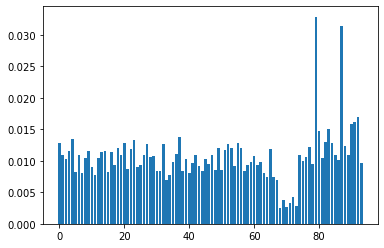

In [51]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [57]:
importance.sort()

In [58]:
importance

array([0.00252088, 0.00263539, 0.00285177, 0.00330997, 0.00380277,
       0.00419905, 0.00693152, 0.00703461, 0.00742079, 0.00745995,
       0.00767727, 0.0077792 , 0.00803822, 0.00807445, 0.00807458,
       0.00821349, 0.00830469, 0.00831331, 0.00835682, 0.00843179,
       0.0084462 , 0.00845445, 0.00855011, 0.00859322, 0.00866984,
       0.00894514, 0.00909883, 0.00915354, 0.00923022, 0.00927434,
       0.00935537, 0.00937191, 0.00938766, 0.00956836, 0.00957829,
       0.00959894, 0.00966834, 0.00979077, 0.00979904, 0.00979961,
       0.00994006, 0.01020435, 0.01030932, 0.01031096, 0.01031224,
       0.01037614, 0.01042581, 0.0105065 , 0.01064354, 0.01065713,
       0.01081529, 0.01082681, 0.01085307, 0.0108646 , 0.01087732,
       0.01089182, 0.01095023, 0.01095538, 0.01096794, 0.01098923,
       0.01099009, 0.01110262, 0.01134903, 0.01147819, 0.01153687,
       0.01156163, 0.0115938 , 0.01164774, 0.01186357, 0.0119132 ,
       0.01202069, 0.01203713, 0.0120553 , 0.01207432, 0.01217

In [59]:
df.columns[79]

'fouls_a'

In [60]:
df.columns[87]

'defenceTeamWidth_h'

(array([5399.,  555., 1557., 2127., 1913., 1257.,  344.,  100.,   35.,
          10.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

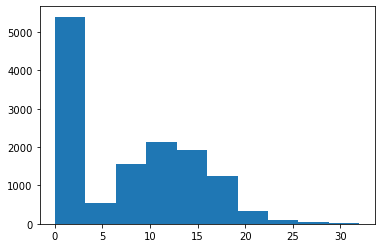

In [62]:
plt.hist(df['fouls_a'])

(array([  64.,  127.,  604., 1673., 2018., 3281., 3239., 1475.,  223.,
         593.]),
 array([33.66666667, 36.95      , 40.23333333, 43.51666667, 46.8       ,
        50.08333333, 53.36666667, 56.65      , 59.93333333, 63.21666667,
        66.5       ]),
 <BarContainer object of 10 artists>)

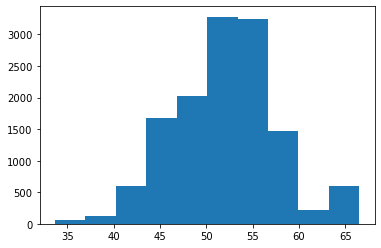

In [64]:
plt.hist(df['defenceTeamWidth_h'])